In [2]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable

   ------------- -------------------------- 1/3 [branca]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   ---------------------------------------- 3/3 [folium]



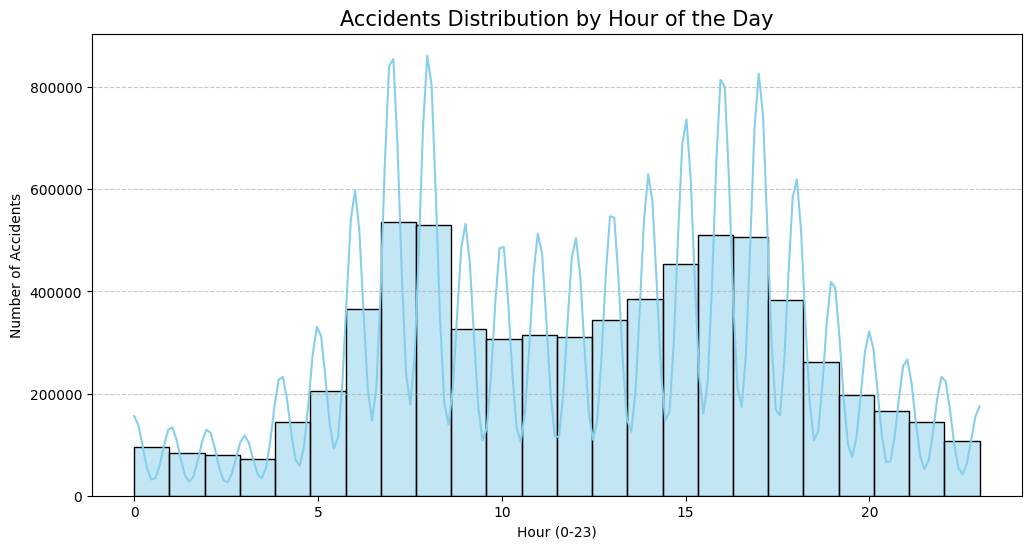

C:\Users\admin\AppData\Local\Temp\ipykernel_6804\3656190454.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.values, y=weather_counts.index, palette='viridis')


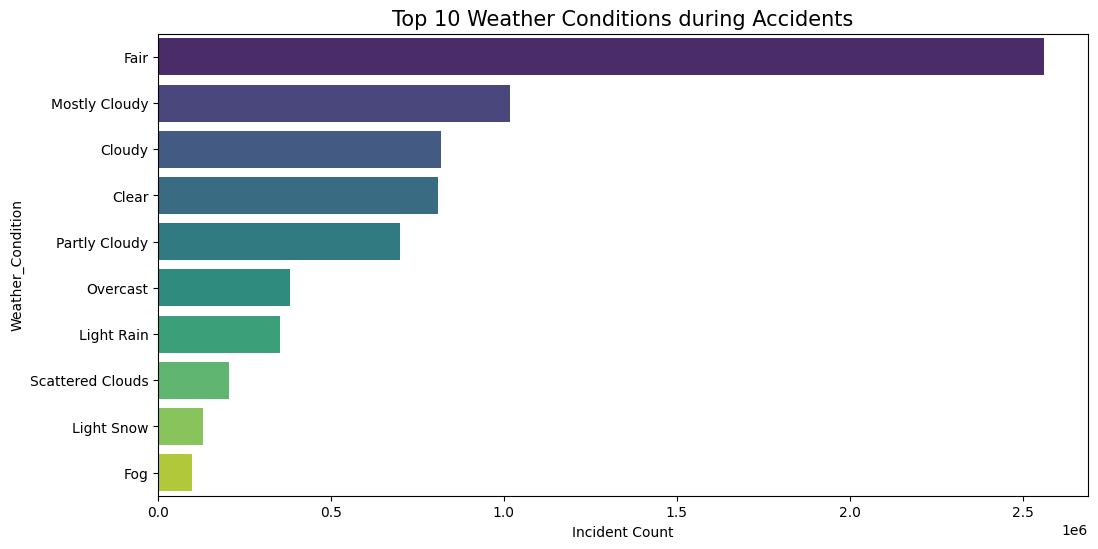

Interactive Map saved as 'accident_hotspots.html'. Open it in your browser!


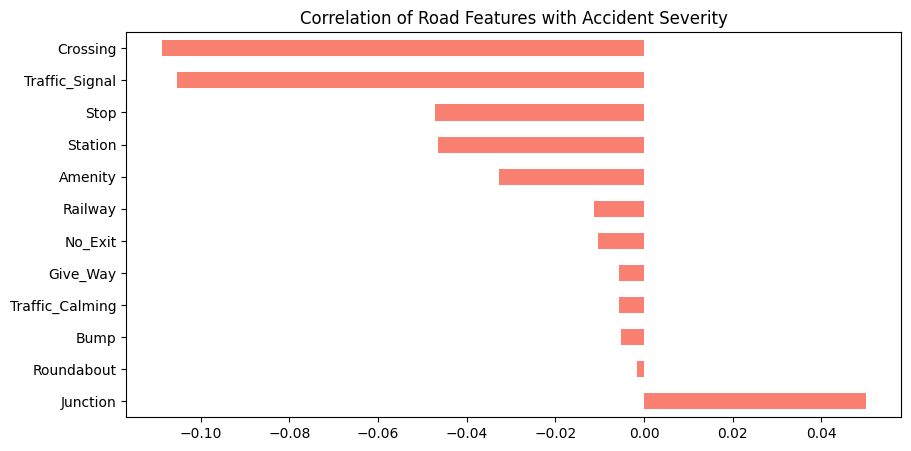

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# 1. LOAD DATA
# Replace 'US_Accidents_Sample.csv' with your actual file path
df = pd.read_csv('US_Accidents_March23.csv')

# 2. DATA PREPROCESSING
# Convert Start_Time to datetime objects
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract Time-based features
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month

# Handling Missing Values in critical columns
df = df.dropna(subset=['Start_Lat', 'Start_Lng', 'Weather_Condition', 'Timezone'])

# 3. ANALYSIS: TIME OF DAY PATTERNS
plt.figure(figsize=(12, 6))
sns.histplot(df['Hour'], bins=24, kde=True, color='skyblue')
plt.title('Accidents Distribution by Hour of the Day', fontsize=15)
plt.xlabel('Hour (0-23)')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# 4. ANALYSIS: WEATHER & ROAD CONDITIONS
plt.figure(figsize=(12, 6))
weather_counts = df['Weather_Condition'].value_counts().head(10)
sns.barplot(x=weather_counts.values, y=weather_counts.index, palette='viridis')
plt.title('Top 10 Weather Conditions during Accidents', fontsize=15)
plt.xlabel('Incident Count')
plt.show()

# 5. GEOSPATIAL VISUALIZATION (Hotspots)
# We will filter for a specific city (e.g., Los Angeles) to keep the map responsive
city_data = df[df['City'] == 'Los Angeles'][['Start_Lat', 'Start_Lng']].sample(5000)

# Create a base map centered around Los Angeles
m = folium.Map(location=[34.0522, -118.2437], zoom_start=11, tiles='CartoDB positron')

# Add Heatmap layer
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in city_data.iterrows()]
HeatMap(heat_data, radius=10, blur=15).add_to(m)

# Save the map to an HTML file
m.save('accident_hotspots.html')
print("Interactive Map saved as 'accident_hotspots.html'. Open it in your browser!")

# 6. ROAD FEATURES CORRELATION
# Checking which road features (Binary: True/False) correlate with Severity
road_features = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']
feature_data = df[road_features + ['Severity']].corr()['Severity'].sort_values(ascending=False)

plt.figure(figsize=(10, 5))
feature_data.drop('Severity').plot(kind='barh', color='salmon')
plt.title('Correlation of Road Features with Accident Severity')
plt.show()